# Exploratory Notebook

In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# Replace commas with empty string in the 'foreign_gross' column
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '')
# Convert the values in the 'foreign_gross' column to float
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'])

# Convert year values to a date format
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2037 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.4+ KB


In [6]:
df.describe()

,domestic_gross,foreign_gross
count,3.359000e+03,2.037000e+03
mean,2.874585e+07,7.487281e+07
std,6.698250e+07,1.374106e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.700000e+06
50%,1.400000e+06,1.870000e+07
75%,2.790000e+07,7.490000e+07
max,9.367000e+08,9.605000e+08


In [7]:
#This shows that there is a revenue value for all movies in this dataset. Domestic or Foreign or both.
#Since we are only looking at American films, we would remove all of these rows where domestic_gross = Null

# Create a boolean mask for the condition
mask = (df['domestic_gross'].isnull())
# Apply the mask to filter the DataFrame
filtered_df = df[mask]
print(len(filtered_df))

# Display the filtered DataFrame
filtered_df

28


,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010-01-01
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010-01-01
302,White Lion,Scre.,NaN,99600.0,2010-01-01
306,Badmaash Company,Yash,NaN,64400.0,2010-01-01
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010-01-01
537,Force,FoxS,NaN,4800000.0,2011-01-01
713,Empire of Silver,NeoC,NaN,19000.0,2011-01-01
871,Solomon Kane,RTWC,NaN,19600000.0,2012-01-01
928,The Tall Man,Imag.,NaN,5200000.0,2012-01-01
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012-01-01


In [8]:
# Drop rows where the value in the 'domestic_gross' column is null
df.dropna(subset=['domestic_gross'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3359 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2009 non-null   float64       
 4   year            3359 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 157.5+ KB


In [9]:
df['title'].value_counts()

Bluebeard                           2
Wanderlust                          1
Great Expectations (2013)           1
The Lesson                          1
The Look of Silence                 1
                                   ..
Mesrine: Public Enemy No. 1         1
I'm Not Ashamed                     1
Young Adult                         1
Peace, Love and Misunderstanding    1
Back to 1942                        1
Name: title, Length: 3358, dtype: int64

In [10]:
# Show rows where title is equal to 'Bluebeard'
bluebeard_rows = df[df['title'] == 'Bluebeard']
bluebeard_rows
#no duplicate movies in this dataset.

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200.0,2010-01-01
3045,Bluebeard,WGUSA,43100.0,NaN,2017-01-01


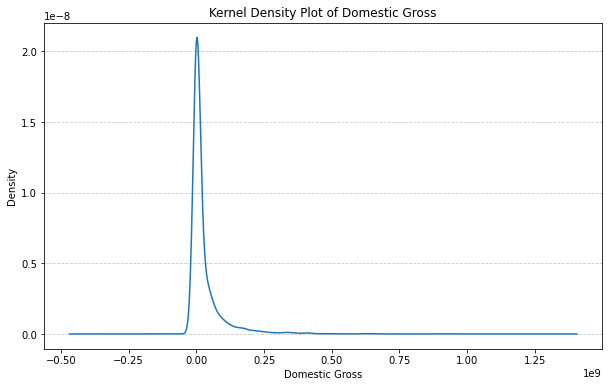

In [11]:
# Plot the kernel density plot of domestic_gross values
df['domestic_gross'].plot(kind='kde', figsize=(10, 6))
plt.title('Kernel Density Plot of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


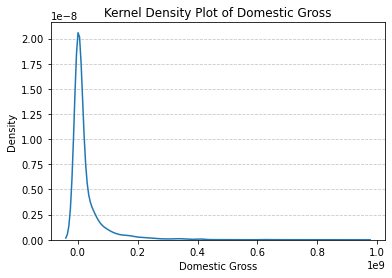

In [12]:
# Plot the kernel density plot of domestic_gross values without standardizing
sns.kdeplot(data=df['domestic_gross'], bw_method=0.2)  # Adjust bw_method as needed for KDE smoothing
plt.title('Kernel Density Plot of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
negative_rows = df[df['domestic_gross'] <= 0]
negative_rows

,title,studio,domestic_gross,foreign_gross,year
